# Core Concepts of Machine Learning

*   **Supervised Learning:** Learning from labeled data. We have input features (X) and a known output target (y). The goal is to learn a mapping function `y = f(X)`.
    *   **Regression:** Predicting a continuous value (e.g., price, temperature, salary).
    *   **Classification:** Predicting a discrete category (e.g., Spam/Not Spam, Cat/Dog).
*   **Unsupervised Learning:** Learning from unlabeled data. The goal is to find hidden patterns or structures in the data (e.g., clustering customers into groups).

   
*   **Reinforcement Learning**: Learning by interacting with an environment. An agent learns to take actions that maximize a reward over time.
    * The agent gets feedback in the form of rewards or penalties.
    * Common in robotics, games (e.g., AlphaGo), and self-driving cars.

*   **The ML Workflow:**
    1.  Get Data
    2.  Explore & Preprocess Data (EDA)
    3.  Split Data (Train/Test)
    4.  Choose & Train a Model
    5.  Evaluate the Model

## 1. Supervised Learning

**Definition:**  
Supervised learning is a type of ML where the model is trained on labeled data.  
Each training example contains an input and a corresponding output. The goal is to learn a mapping from inputs to outputs.

**Applications:**  
- Predicting house prices  
- Email spam detection  
- Stock price prediction  

**Common Algorithms:**  
- Linear Regression  
- Logistic Regression  
- Decision Trees  
- Support Vector Machines (SVM)

# Linear Regression – Complete Explanation

## 1️⃣ What is Linear Regression?

Linear Regression is a **supervised machine learning algorithm** used for predicting **continuous values**.

It models the relationship between:

- **Independent variables (X)** → Inputs / Features  
- **Dependent variable (y)** → Output / Target  

It assumes a **linear relationship** between X and y.

## 2️⃣ Mathematical Formula

### 🔹 Simple Linear Regression (One Feature)

$
y = \beta_0 + \beta_1 x
$

Where:  
- $y$ = predicted value  
- $\beta_0$ = intercept  
- $\beta_1$ = slope (coefficient)  
- $x$ = input feature

### 🔹 Multiple Linear Regression (Multiple Features)

$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$

## 3️⃣ How It Works (Core Idea)

Linear Regression finds the **best-fitting line** by **minimizing the error** between actual and predicted values.

### 🔹 Cost Function (Mean Squared Error)

$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

The algorithm tries to **minimize MSE**.


## R-squared (R²) Formula

$$
R^2 = 1 - \frac{SS_{residual}}{SS_{total}}
$$

### Where:

$$
SS_{residual} = \sum (y_{actual} - y_{predicted})^2
$$

$$
SS_{total} = \sum (y_{actual} - \bar{y})^2
$$

$$
\bar{y} = \text{mean of actual values}
$$

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the Data
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
}
df = pd.DataFrame(data)

# 2. Exploratory Data Analysis (EDA)

print(df.head())

df.info()

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


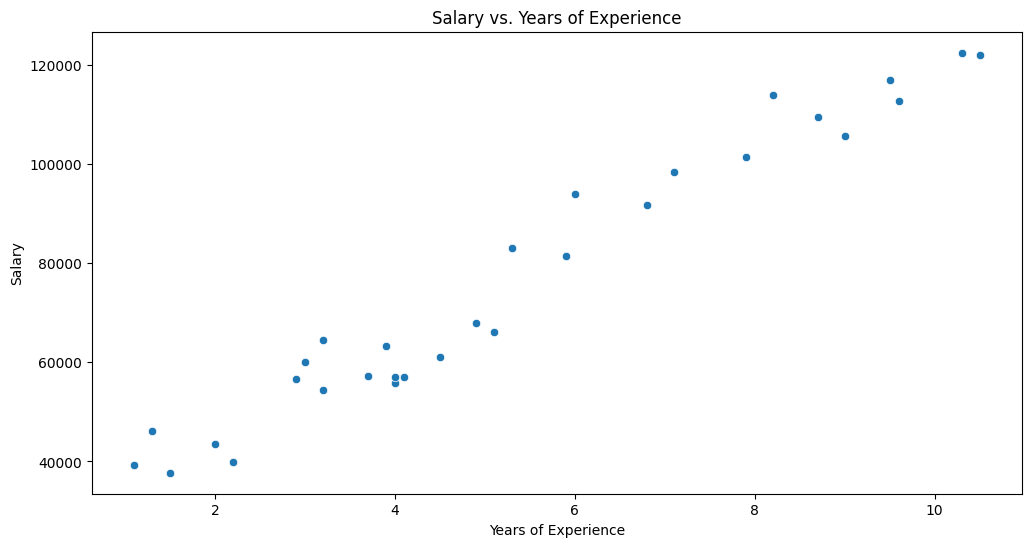

In [2]:
# Visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [3]:
# 3. Prepare Data for Modeling
# X should be a 2D array, so we use [['YearsExperience']]
X = df[['YearsExperience']]
print(X.shape)
y = df['Salary']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

(30, 1)

Training set shape: (24, 1)
Testing set shape: (6, 1)


In [4]:
# 4. Choose & Train the Model
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel training complete.")

# Print the learned parameters
print(f"Coefficient (w1): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")


Model training complete.
Coefficient (w1): 9423.815323030976
Intercept (b): 25321.583011776813


In [6]:
# 5. Evaluate the Model
y_pred = model.predict(X_test)
print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [8]:
print(X_test)

    YearsExperience
27              9.6
15              4.9
23              8.2
17              5.3
8               3.2
9               3.7


In [9]:
print(y_test)

27    112635
15     67938
23    113812
17     83088
8      64445
9      57189
Name: Salary, dtype: int64


In [10]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}") # R2 is the proportion, Closer to 1 is better.


Mean Squared Error (MSE): 49830096.86
Root Mean Squared Error (RMSE): 7059.04
R-squared (R2): 0.90


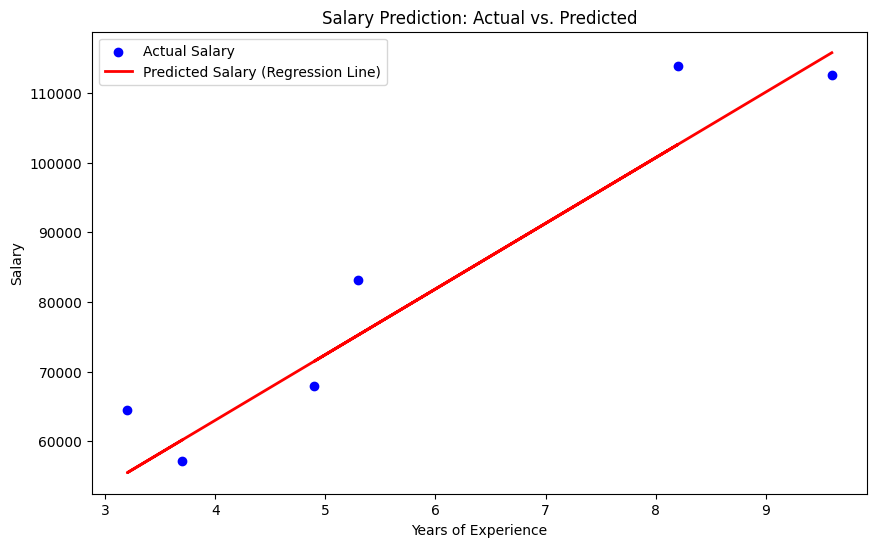

In [11]:
# 6. Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Salary (Regression Line)')
plt.title('Salary Prediction: Actual vs. Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [24]:
# 7. Make a new prediction
new_experience = np.array([[10.3]])
predicted_salary = model.predict(new_experience)
print(f"\nPredicted salary for {new_experience[0][0]} years of experience: ${predicted_salary[0]:.2f}")


Predicted salary for 10.3 years of experience: $122386.88


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
np.random.seed(42)

years = np.linspace(0.5, 20, 100)
salary = 30000 + (years * 9000) + np.random.normal(0, 8000, 100)

df_generated = pd.DataFrame({
    'YearsExperience': years,
    'Salary': salary.astype(int)
})

print(df_generated.head())

   YearsExperience  Salary
0         0.500000   38473
1         0.696970   35166
2         0.893939   43226
3         1.090909   52002
4         1.287879   39717


In [26]:
# Additional data points
more_data = {
    'YearsExperience': [
        0.5, 0.8, 1.0,
        11.0, 11.5, 12.0, 12.5,
        13.0, 13.5, 14.0,
        15.0, 16.0, 17.0, 18.0, 19.0, 20.0
    ],
    'Salary': [
        32000, 35000, 38000,
        125000, 130000, 135000, 138000,
        142000, 148000, 150000,
        160000, 170000, 180000, 190000, 200000, 210000
    ]
}

df_more = pd.DataFrame(more_data)

# Combine with original dataset
df_extended = pd.concat([df, df_more, df_generated], ignore_index=True)

print(df_extended.tail())
print("Total records:", len(df_extended))

     YearsExperience  Salary
141        19.212121  191200
142        19.409091  207050
143        19.606061  208542
144        19.803030  208268
145        20.000000  208123
Total records: 146


In [27]:
# 3. Prepare Data for Modeling
# X should be a 2D array, so we use [['YearsExperience']]
X = df_extended[['YearsExperience']]
print(X.shape)
y = df_extended['Salary']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

(146, 1)

Training set shape: (116, 1)
Testing set shape: (30, 1)


In [28]:
# 4. Choose & Train the Model
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel training complete.")

# Print the learned parameters
print(f"Coefficient (w1): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")


Model training complete.
Coefficient (w1): 9089.371227091564
Intercept (b): 27966.141155657242


In [29]:
# 5. Evaluate the Model
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}") # R2 is the proportion, Closer to 1 is better.

Mean Squared Error (MSE): 53100684.19
Root Mean Squared Error (RMSE): 7287.02
R-squared (R2): 0.98


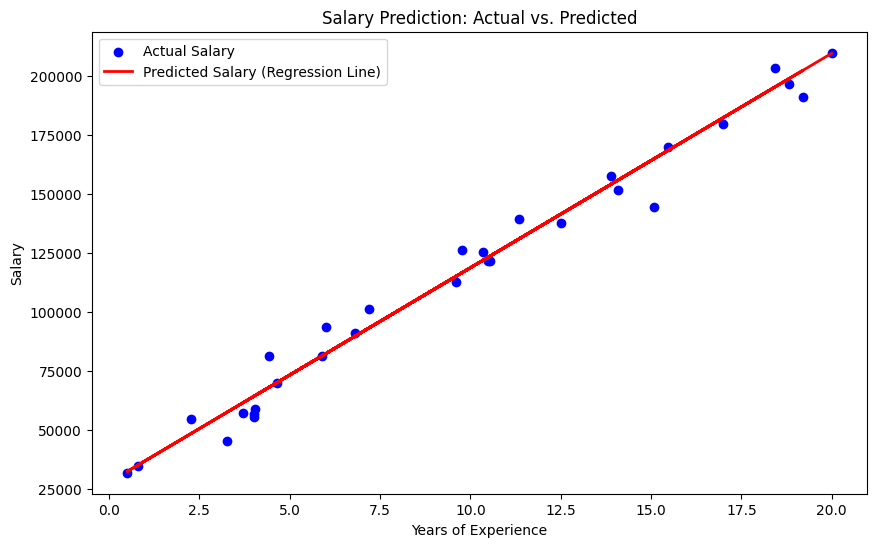

In [30]:
# 6. Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Salary (Regression Line)')
plt.title('Salary Prediction: Actual vs. Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [34]:
# 7. Make a new prediction
new_experience = np.array([[20]])
predicted_salary = model.predict(new_experience)
print(predicted_salary)
print(f"\nPredicted salary for {new_experience[0][0]} years of experience: ${predicted_salary[0]:.2f}")

[209753.56569749]

Predicted salary for 20 years of experience: $209753.57


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
